To address this project, which involves analyzing house sales data in King County and providing recommendations on how performing renovations can increase the estimated value of homes, you will need to follow a structured approach. Below, I outline a step-by-step process to fulfill the project requirements:

1. Runs and Interprets a Simple Baseline Model:

a. Data Preprocessing:
- Clean the dataset: Check for missing values, duplicates, and outliers. Handle them appropriately (e.g., impute missing values, remove duplicates, or address outliers).
- Feature engineering: Create any necessary new features based on domain knowledge (e.g., calculate the age of the house, create categorical variables from continuous ones if needed).
- Split the data into training and testing sets.

b. Baseline Model:
- Start with a simple linear regression model as your baseline model. Use the existing features (e.g., bedrooms, bathrooms, sqft_living) to predict the house price.
- Train the model on the training data and evaluate its performance on the testing data using appropriate metrics (e.g., mean squared error, R-squared).

c. Interpretation:
- Analyze the model's coefficients to understand which features have the most significant impact on house prices.
- Plot the model's predictions against actual prices to visualize its performance.
- Summarize the baseline model's limitations and areas for improvement.

2. Introduces New Models and Interprets Their Results:

a. Feature Engineering and Model Selection:
- Experiment with feature engineering techniques (e.g., interaction terms, polynomial features) to create new predictors that may improve model performance.
- Consider trying different regression algorithms (e.g., Ridge regression, Lasso regression, Random Forest regression, Gradient Boosting) to build more complex models.

b. Model Training and Evaluation:
- Train the new models on the training data and evaluate their performance on the testing data.
- Compare the performance metrics of the new models to the baseline model.

c. Interpretation:
- Interpret the coefficients or feature importances of the new models to understand the impact of different features on house prices.
- Use visualization techniques (e.g., feature importance plots, partial dependence plots) to explain how the models make predictions.
- Compare the interpretability of different models.

3. Justify Model Changes Based on Results and Problem Context:

a. Justification for Model Selection:
- Explain why you chose specific models and feature engineering techniques based on the results of prior models and the problem context.
- Discuss the trade-offs between model complexity and interpretability.

b. Explain Model Performance:
- Describe how the new models outperform or underperform the baseline model.
- Discuss any limitations or challenges encountered during model development.

4. Describe Improvements Found from Running New Models:

a. Quantify Model Improvements:
- Provide quantitative measures of how the new models improve over the baseline (e.g., lower mean squared error, higher R-squared).

b. Discuss Insights and Recommendations:
- Share insights gained from the improved models regarding which renovations or features are most likely to increase the estimated value of homes.
- Offer recommendations based on the model results, such as suggesting specific renovations or improvements that homeowners can consider.

Remember to document your process, code, and results clearly, and provide visualizations and explanations to make your findings and recommendations understandable to stakeholders in the real estate agencies. Additionally, you may consider conducting cross-validation to assess model robustness and perform hyperparameter tuning to optimize model performance further.

In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [27]:
import pandas as pd
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [28]:
# Your code here - look at correlations
correlation_matrix = df.corr()


In [29]:
correlation_with_price = correlation_matrix['price'].abs().sort_values(ascending=False)

# The first element of the sorted series will be the feature with the highest correlation to 'price'
most_correlated = correlation_with_price.index[1]

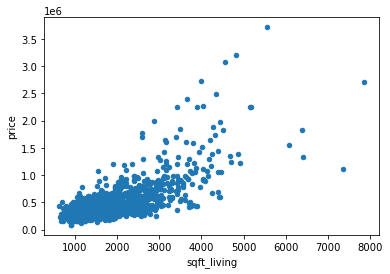

In [30]:
df.sample(1000, random_state=1).plot.scatter(x=most_correlated, y="price");

In [31]:
y = df['price']
X_baseline = df[['sqft_living']]

In [32]:
# Run this cell without changes
import statsmodels.api as sm

baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Split the data into training and testing sets (you can adjust the test_size and random_state)
X_train, X_test, y_train, y_test = train_test_split(X_baseline, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the R-squared value (a measure of model goodness-of-fit)
r_squared = r2_score(y_test, y_pred)

# Calculate the mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Get the model coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_
print(f"R-squared: {r_squared:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Coefficient for '{most_correlated}': {coefficients[0]:.2f}")
print(f"Intercept: {intercept:.2f}")

# Interpretation of coefficients
print(f"The coefficient for '{most_correlated}' represents the change in 'price' for a one-unit change in '{most_correlated}' while holding all other factors constant.")

R-squared: 0.49
Mean Squared Error: 65977373783.62
Coefficient for 'sqft_living': 282.20
Intercept: -46447.35
The coefficient for 'sqft_living' represents the change in 'price' for a one-unit change in 'sqft_living' while holding all other factors constant.


It seems like you've reported the metrics and coefficients for your linear regression model. Here's what each of these values means:

R-squared (R²): R-squared measures the proportion of the variance in the dependent variable (in this case, 'price') that is predictable from the independent variables (features) in your model. An R-squared of 0.49 indicates that your model explains approximately 49% of the variance in house prices. It's a measure of how well your model fits the data, with higher values indicating a better fit.

Mean Squared Error (MSE): MSE is a measure of the average squared difference between the actual 'price' values and the predicted 'price' values by your model. A lower MSE indicates a better fit. In this case, your model has an MSE of approximately 65,977,373,783.62, which means, on average, the squared difference between the actual and predicted prices is that large.

Coefficient for 'sqft_living': The coefficient for 'sqft_living' represents the change in the predicted 'price' for a one-unit change in the 'sqft_living' feature while holding all other factors (features) constant. In your case, for every additional square foot of living space ('sqft_living'), the predicted 'price' increases by 282.20 units.

Intercept: The intercept represents the predicted 'price' when all independent variables (features) are set to zero. In this context, it likely doesn't have a meaningful interpretation, as it's unlikely that a house with zero square feet of living space or zero bedrooms would exist. The intercept is a baseline value for the predicted 'price.'

Your interpretation of the coefficient for 'sqft_living' is correct. It tells you how much the model predicts the 'price' will change for each additional square foot of living space, assuming that all other features are constant. Keep in mind that this is a simplified interpretation, and real estate prices are influenced by many factors.



In [34]:

import pandas as pd

# Assuming 'df' is your DataFrame and 'categorical_column' is the column you want to one-hot encode
# Replace 'categorical_column' with the actual name of your categorical column

# Use the pandas get_dummies function to perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=['condition'], prefix=['condition'])
df_encoded

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,condition_Average,condition_Fair,condition_Good,condition_Poor,condition_Very Good
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,98178,47.5112,-122.257,1340,5650,1,0,0,0,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,98125,47.7210,-122.319,1690,7639,1,0,0,0,0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,98028,47.7379,-122.233,2720,8062,1,0,0,0,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,98136,47.5208,-122.393,1360,5000,0,0,0,0,1
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,98074,47.6168,-122.045,1800,7503,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,98103,47.6993,-122.346,1530,1509,1,0,0,0,0
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,98146,47.5107,-122.362,1830,7200,1,0,0,0,0
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,98144,47.5944,-122.299,1020,2007,1,0,0,0,0
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,98027,47.5345,-122.069,1410,1287,1,0,0,0,0


In [35]:
# Run this cell without changes
X_iterated = df[[most_correlated, 'condition']]
X_iterated

,sqft_living,condition
0,1180,Average
1,2570,Average
2,770,Average
3,1960,Very Good
4,1680,Average
...,...,...
21592,1530,Average
21593,2310,Average
21594,1020,Average
21595,1600,Average


In [36]:
# Replace None with appropriate code

# Use pd.get_dummies to one-hot encode the categorical column in X_iterated
X_iterated = pd.get_dummies(X_iterated, columns=['condition'])
X_iterated

,sqft_living,condition_Average,condition_Fair,condition_Good,condition_Poor,condition_Very Good
0,1180,1,0,0,0,0
1,2570,1,0,0,0,0
2,770,1,0,0,0,0
3,1960,0,0,0,0,1
4,1680,1,0,0,0,0
...,...,...,...,...,...,...
21592,1530,1,0,0,0,0
21593,2310,1,0,0,0,0
21594,1020,1,0,0,0,0
21595,1600,1,0,0,0,0


# Build a Multiple Linear Regression Model
#Using the y variable from our previous model and X_iterated, build a model called iterated_model and a regression results object called iterated_results.


In [37]:
# Your code here
import statsmodels.api as sm

# Add a constant term to the independent variables (intercept)
X_iterated_with_constant = sm.add_constant(X_iterated)

# Create the linear regression model
iterated_model = sm.OLS(y, X_iterated_with_constant)

# Fit the model to the data
iterated_results = iterated_model.fit()

In [38]:
# Run this cell without changes
print(iterated_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     4307.
Date:                Thu, 07 Sep 2023   Prob (F-statistic):               0.00
Time:                        00:37:14   Log-Likelihood:            -2.9992e+05
No. Observations:               21597   AIC:                         5.999e+05
Df Residuals:                   21591   BIC:                         5.999e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -2.361e+04   9

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset (assuming it's in a DataFrame called 'data')
# Perform data preprocessing steps here

# Split the data into training and testing sets
X = df.drop(columns=['price'])  # Independent variables
y = df['price']  # Dependent variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Model Selection:

Choose a regression algorithm. Common choices include Linear Regression, Decision Trees, Random Forests, Gradient Boosting, etc. You can try different algorithms and compare their performance.
Train multiple models with different hyperparameters.

In [40]:

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize and train different regression models
linear_reg_model = LinearRegression()
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the models
linear_reg_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)

ValueError: could not convert string to float: '12/22/2014'

3. Model Evaluation:

Evaluate model performance using appropriate metrics. For regression tasks, common metrics include Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE).
python

In [42]:


# Make predictions using the trained models
y_pred_linear_reg = linear_reg_model.predict(X_test)
y_pred_random_forest = random_forest_model.predict(X_test)

# Calculate evaluation metrics
mae_linear_reg = mean_absolute_error(y_test, y_pred_linear_reg)
mae_random_forest = mean_absolute_error(y_test, y_pred_random_forest)

mse_linear_reg = mean_squared_error(y_test, y_pred_linear_reg)
mse_random_forest = mean_squared_error(y_test, y_pred_random_forest)

rmse_linear_reg = np.sqrt(mse_linear_reg)
rmse_random_forest = np.sqrt(mse_random_forest)

print("Linear Regression Metrics:")
print("MAE:", mae_linear_reg)
print("MSE:", mse_linear_reg)
print("RMSE:", rmse_linear_reg)

print("\nRandom Forest Metrics:")
print("MAE:", mae_random_forest)
print("MSE:", mse_random_forest)
print("RMSE:", rmse_random_forest)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

4. Model Selection and Tuning:

Based on the evaluation results, choose the model that performs best. You can also fine-tune hyperparameters for the selected model to improve performance further.